# Speech Alignment using DTW
- Created: 07 Apr 2020

In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, librosa, pickle, scipy, shutil, librosa.display, matplotlib
from os.path import join
from functools import partial
from IPython.display import Audio

In [2]:
def import_data(data_path):
    
    with open(join(data_path,'sound_set.txt'), 'r') as f:
        data = np.array(f.read().split(','))
    audio_paths = [join(data_path,file+'.wav') for file in data]

    audio_data = np.array([ librosa.load(file, sr=SAMPLE_RATE)[0] for file in audio_paths ])
    return audio_data

In [70]:
SAMPLE = 50

In [50]:
SAMPLE_RATE = 16000
DATA_PATH = 'sample_data/inverse_sound_aj/'
inverse_aj = import_data(DATA_PATH)

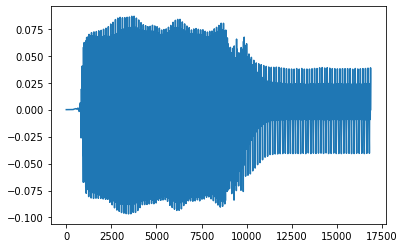

In [71]:
plt.plot(inverse_aj[SAMPLE])

In [52]:
SAMPLE_RATE = 16000
DATA_PATH = '../data/d_records/d_record_aj/'
audio_aj = import_data(DATA_PATH)

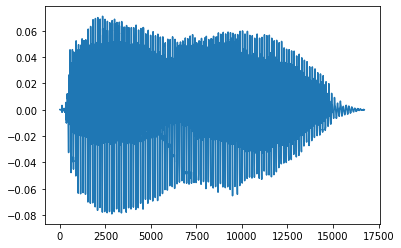

In [72]:
plt.plot(audio_aj[SAMPLE])

In [69]:
Audio(audio_aj[SAMPLE], rate=16000)

In [73]:
D, wp = librosa.sequence.dtw(inverse_aj[SAMPLE], audio_aj[SAMPLE], metric='euclidean')

In [63]:
n_inverse_aj = [inverse_aj[SAMPLE][i[0]] for i in np.flip(wp, axis=0)]

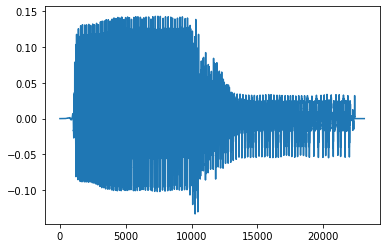

In [64]:
plt.plot(n_inverse_aj)

In [65]:
n_audio_aj = [audio_aj[SAMPLE][i[1]] for i in np.flip(wp, axis=0)]

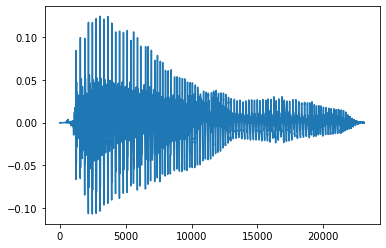

In [66]:
plt.plot(n_audio_aj)

In [68]:
Audio(n_audio_aj, rate=16000)

In [62]:
np.flip(wp, axis=0)

array([[    0,     0],
       [    1,     1],
       [    2,     2],
       ...,
       [15020, 14858],
       [15020, 14859],
       [15020, 14860]])

In [60]:
wp

array([[15020, 14860],
       [15020, 14859],
       [15020, 14858],
       ...,
       [    2,     2],
       [    1,     1],
       [    0,     0]])